# Sprint データセット作成
### 目的
* データセットを作成し学習する
* データ拡張を行う
### どのように学ぶか
自作のデータセットを作り、さらにデータ拡張も行なっていく．

# 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。
## １．画像を読み込む

In [1]:
import numpy  as np
#osにしている機能（ディレクトリ操作とか）を使う
import os
#引数に指定されたパターンにマッチするファイルパス名を取得する
import glob 
#正規表現を扱う
import re

import matplotlib.pyplot as plt

#画像を使うのにいる．
from PIL import Image

%matplotlib inline

In [2]:
#globを利用して画像を読み込む
path = './Sprint_18_image/'
img_list = glob.glob(path + '/*' + ".jpg")
img_list

['./Sprint_18_image\\cat_01.jpg',
 './Sprint_18_image\\cat_02.jpg',
 './Sprint_18_image\\cat_03.jpg',
 './Sprint_18_image\\cat_04.jpg',
 './Sprint_18_image\\cat_05.jpg',
 './Sprint_18_image\\cat_06.jpg',
 './Sprint_18_image\\cat_07.jpg',
 './Sprint_18_image\\dog_01.jpg',
 './Sprint_18_image\\dog_02.jpg',
 './Sprint_18_image\\dog_03.jpg',
 './Sprint_18_image\\dog_04.jpg',
 './Sprint_18_image\\dog_05.jpg',
 './Sprint_18_image\\dog_06.jpg',
 './Sprint_18_image\\dog_07.jpg']

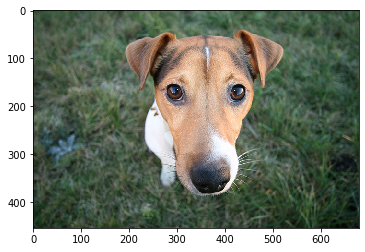

In [3]:
#最後の画像を見てみる
img = img_list[-1]
img = Image.open(img)
plt.imshow(img)

かわいい．

## ２．イメージのロード、配列化、リサイズ、データセット作成

In [4]:
dog_img_array = np.empty((0,256,256,3))
cat_img_array = np.empty((0,256,256,3))

for img in img_list:
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((256,256))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0#正規化
        
        # axisの追加
        dog_img = dog_img.reshape((1,256,256,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((256,256))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0#正規化
        
        cat_img = cat_img.reshape((1,256,256,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [5]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(7, 256, 256, 3)  cat_image:(7, 256, 256, 3)


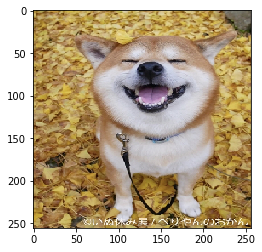

In [6]:
#表示
plt.imshow(dog_img_array[0])

かわいい．

In [7]:
dog_img_array[0]

array([[[0.61176471, 0.52941176, 0.26666667],
        [0.7254902 , 0.63529412, 0.36078431],
        [0.71372549, 0.61960784, 0.34509804],
        ...,
        [0.42745098, 0.41568627, 0.35686275],
        [0.40784314, 0.39215686, 0.34509804],
        [0.39215686, 0.37647059, 0.33333333]],

       [[0.57647059, 0.46666667, 0.17647059],
        [0.67843137, 0.55686275, 0.24313725],
        [0.67058824, 0.54901961, 0.23529412],
        ...,
        [0.38039216, 0.36862745, 0.30196078],
        [0.37647059, 0.36470588, 0.30588235],
        [0.36078431, 0.34509804, 0.30980392]],

       [[0.59607843, 0.47843137, 0.19215686],
        [0.68235294, 0.54509804, 0.22745098],
        [0.68627451, 0.54901961, 0.22745098],
        ...,
        [0.40784314, 0.38039216, 0.30980392],
        [0.38039216, 0.35686275, 0.29411765],
        [0.3372549 , 0.32941176, 0.28235294]],

       ...,

       [[0.4745098 , 0.34509804, 0.16862745],
        [0.50588235, 0.36078431, 0.18823529],
        [0.49411765, 0

In [8]:
# ラベル付け
X = np.vstack((dog_img_array,cat_img_array))
#配列の最初がdog，その後cat
y_dog = np.ones(7).reshape(-1)#犬は１
y_cat = np.zeros(7).reshape(-1)#猫は０
y = np.hstack((y_dog,y_cat))
X.shape,y.shape

((14, 256, 256, 3), (14,))

## ３．ImageNetで学習したモデル（MobileNet V2）で転移学習

In [9]:
#データのshape
n_sample, image_size,image_size, n_chan = X.shape
n_sample, image_size,image_size, n_chan

(14, 256, 256, 3)

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import matplotlib.image as mpimg

TensorFlow version is  1.14.0


In [11]:
IMG_SHAPE = (256,256,3)
print(IMG_SHAPE)
# 事前トレーニング済みモデルMobileNet V2から基本モデルを作成します
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,#MobileNetV2モデルから全結合層を除く
                                               weights='imagenet')

(256, 256, 3)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [12]:
#畳み込み層のフリーズ（学習せずにそのまま使う）
base_model.trainable = False
#基本モデルのアーキテクチャを見てみましょう
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 257, 257, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [13]:
model = tf.keras.Sequential([
  base_model,# MobileNet V2 から全結合層を除いたもの
  keras.layers.GlobalAveragePooling2D(),#プーリング層
  keras.layers.Dense(1, activation='sigmoid')#全結合層
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 8, 8, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
batch_size = 1

#ImageDataGeneratorオブジェクトを作成
#rescale=Noneは正規化しない，data_format='channels_last'は配列の最後のshapeはチャネルだよ，の意
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=None,data_format='channels_last')

#ジェネレータのバッチを作成（flowの場合は，numpy配列を渡す．）
train_generator = train_datagen.flow(x=X,y=y,
                                     batch_size=batch_size)

In [15]:
epochs = 100
steps_per_epoch = n_sample // batch_size
#学習
history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4)

Epoch 1/100
14/14 [==============================] - 6s 436ms/step - loss: 0.7551 - acc: 0.3571
Epoch 2/100
14/14 [==============================] - 3s 241ms/step - loss: 0.7355 - acc: 0.5000
Epoch 3/100
14/14 [==============================] - 3s 239ms/step - loss: 0.7289 - acc: 0.3571
Epoch 4/100
14/14 [==============================] - 3s 244ms/step - loss: 0.7279 - acc: 0.4286
Epoch 5/100
14/14 [==============================] - 3s 234ms/step - loss: 0.7252 - acc: 0.4286
Epoch 6/100
14/14 [==============================] - 4s 251ms/step - loss: 0.7233 - acc: 0.4286
Epoch 7/100
14/14 [==============================] - 3s 247ms/step - loss: 0.7219 - acc: 0.4286
Epoch 8/100
14/14 [==============================] - 3s 247ms/step - loss: 0.7211 - acc: 0.3571
Epoch 9/100
14/14 [==============================] - 3s 233ms/step - loss: 0.7192 - acc: 0.4286
Epoch 10/100
14/14 [==============================] - 4s 254ms/step - loss: 0.7183 - acc: 0.5000
Epoch 11/100
14/14 [===================

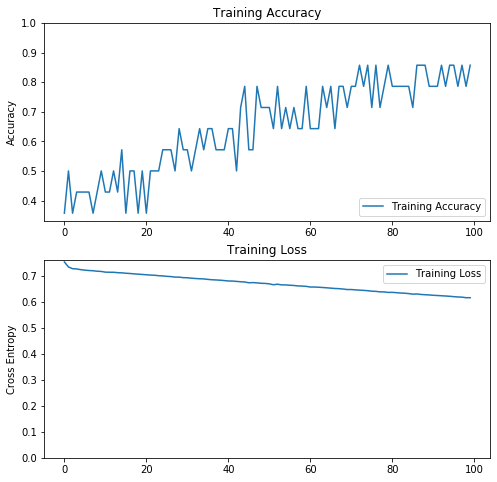

In [41]:
acc = history.history['acc']
loss = history.history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training Loss')
plt.show()

In [45]:
y_pred_proba = model.predict(test_array)
y_pred = np.where(y_pred_proba >0.5, 1, 0)
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])


# 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

### 《データ拡張のためのライブラリ》

データ拡張にはalbumentationsなどがあります。https://github.com/albu/albumentations
また、Kerasを使う場合はImageDataGeneratorも便利です。


### 《データ拡張の効果の調査》
keras_ImageDataGenerator:https://qiita.com/yaegaki/items/276b27ab660bfbe8782e
データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [18]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [19]:
def show_imgs(imgs, row, col):
    plt.figure(figsize=(5,5))
    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        
        plt.tick_params(labelbottom=False)
        plt.tick_params(labelleft=False)
        plt.imshow(img)
    plt.show()

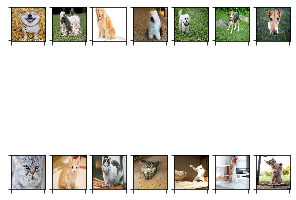

In [20]:
show_imgs(X,2,7)

#### os.makedirs('作成したいディレクトリpath',exist_ok=True)
**exist_ok=True**とすると，既に末端ディレクトリが存在している場合もエラーが発生しない。末端ディレクトリが存在していなければ新規作成するし、存在していれば何もしない。前もって末端ディレクトリの存在確認をする必要がないので便利。

In [31]:
%pwd

'C:\\Users\\miyas\\dive\\diveintocode-ml\\Term2\\Sprint18_Make_Data'

In [21]:
#生成した画像を保存するディレクトリを作成する
save_path = './data_augmentation'
#os.makedirs(save_path, exist_ok=True)

In [22]:
#ImageDataGeneratorオブジェクトの作成
datagen_rot = ImageDataGenerator(rotation_range=40.,rescale=1./255)#-40～40度回転
datagen_ver = ImageDataGenerator(vertical_flip=True,rescale=1./255)#ランダムに上下反転
datagen_hor = ImageDataGenerator(horizontal_flip=True,rescale=1./255)#ランダムに左右反転
datagen_wid = ImageDataGenerator(width_shift_range=0.3,rescale=1./255)#左右平行移動
datagen_hei = ImageDataGenerator(height_shift_range=0.3,rescale=1./255)#上下平行移動
datagen_zoom = ImageDataGenerator(zoom_range=0.5,rescale=1./255)#ランダムに拡大縮小
datagen_bri = ImageDataGenerator(brightness_range=[0,0.8],rescale=1./255)#明度を変更(0～1の値．１に近いほど元画像，0に近いほど暗くなる)
datagen_shift = ImageDataGenerator(channel_shift_range=100,rescale=1./255)#各画素値に値を足す
datagen_she = ImageDataGenerator(shear_range=50,rescale=1./255)#画像が引っ張られる
img_obj = [datagen_rot,datagen_ver,datagen_hor,datagen_wid,datagen_hei,datagen_zoom,datagen_bri,datagen_shift,datagen_she]
img_obj2 = [datagen_bri,datagen_shift]
img_obj3 = [datagen_bri]
img_obj4 = [datagen_shift]

In [23]:
def create(X,y,img_obj):
    """flowバージョン（データをndarrayで渡す）"""
    for obj in img_obj:
        gen = obj.flow(X,y,batch_size=X.shape[0],#すべての画像に対して処理したいので，バッチサイズはサンプル数
                       save_to_dir=save_path,#保存する場所
                       save_prefix='augmentation',#データ名
                       save_format='png')#拡張子
        #1つの同じ画像処理を
        for i in range(10):
            data = next(gen)

In [47]:
#create(X,y,img_obj)

In [24]:
def create_dir(img_obj,directory):
    """flow_from_directoryバージョン：画像をディレクトリ事渡す（train_dir <- dog_dir,cat_dir）
    """
    for obj in img_obj:
        gen = obj.flow_from_directory(directory,#ディレクトリのpassを渡す
                                      target_size=(256, 256),#サイズをそろえる．
                                      color_mode='rgb',
                                      batch_size=X.shape[0],
                                      class_mode='binary',#1次元の2値ラベルがつく（'categorical'にしたら2次元のOne-Hot）
                                      save_to_dir=save_path,#保存する場所
                                      save_prefix='aug',
                                      save_format='png')#拡張子
        #1つの同じ画像処理を
        for i in range(10):
            data = next(gen)

In [25]:
#directoryのpassを指定
#Sprint18_train_imgの中に，catディレクトリとdogディレクトリがある
train_dir = './Sprint18_train_img/'

In [76]:
#create_dir(img_obj,train_dir)

Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [32]:
save_path = './data_augmentation/'
img_list = glob.glob(save_path + '/*' + ".png")
img_list

['./data_augmentation\\aug_0_1120644.png',
 './data_augmentation\\aug_0_1189663.png',
 './data_augmentation\\aug_0_1394227.png',
 './data_augmentation\\aug_0_1421987.png',
 './data_augmentation\\aug_0_1427383.png',
 './data_augmentation\\aug_0_1490406.png',
 './data_augmentation\\aug_0_1536660.png',
 './data_augmentation\\aug_0_1637982.png',
 './data_augmentation\\aug_0_1686044.png',
 './data_augmentation\\aug_0_1774358.png',
 './data_augmentation\\aug_0_2050295.png',
 './data_augmentation\\aug_0_2051580.png',
 './data_augmentation\\aug_0_213315.png',
 './data_augmentation\\aug_0_224156.png',
 './data_augmentation\\aug_0_2345213.png',
 './data_augmentation\\aug_0_24374.png',
 './data_augmentation\\aug_0_2437506.png',
 './data_augmentation\\aug_0_2445795.png',
 './data_augmentation\\aug_0_2531883.png',
 './data_augmentation\\aug_0_2699104.png',
 './data_augmentation\\aug_0_2816533.png',
 './data_augmentation\\aug_0_2902459.png',
 './data_augmentation\\aug_0_2974863.png',
 './data_augmen

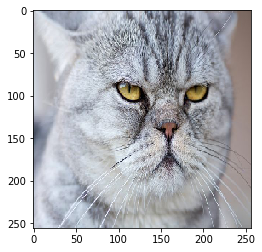

In [37]:
#元画像
plt.imshow(cat_img_array[0])

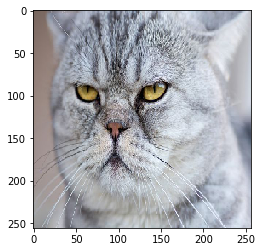

In [35]:
#変更後
img = img_list[1]
img = Image.open(img)
plt.imshow(img)

# 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

### 《アノテーションのためのツール》

アノテーションツールにはLabelImgなどがあります。https://github.com/tzutalin/labelImg

### まずは拾ってきた画像をすべて同じサイズにリサイズして保存

In [39]:
#生成した画像を保存するディレクトリを作成する
new_dir = './Sprint18_resize_image'
os.makedirs(new_dir, exist_ok=True)

In [40]:
#保存先
to_dir = 'Sprint18_resize_image'
for img in img_list:
    data = Image.open(img)#画像を開く
    data = data.resize((256,256))# サイズを揃える
    file_name = os.path.basename(img)#ファイル名の取得（os.path.basename）
    print(file_name)
    data.save(os.path.join(to_dir,file_name))#保存

cat_01.jpg
cat_02.jpg
cat_03.jpg
cat_04.jpg
cat_05.jpg
cat_06.jpg
cat_07.jpg
dog_01.jpg
dog_02.jpg
dog_03.jpg
dog_04.jpg
dog_05.jpg
dog_06.jpg
dog_07.jpg


# 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [89]:
#!pip install albumentations

In [56]:
np.__version__

'1.16.4'

In [16]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
import albumentations
from albumentations import (
    BboxParams,
    HorizontalFlip,#左右反転
    VerticalFlip,#垂直に反転
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

from PIL import Image
import PIL


## １．cocodatasetで動きの確認

In [433]:
def download_image(url):
    """webからデータを取得"""
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [434]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    """バウンディングボックスとクラスラベルを視覚化する関数"""
    print(bbox)
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=2)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    """バウンディングボックスを画像と合わせて表示する"""
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(6,6))
    plt.imshow(img)

検出タスクの場合、少なくともformatフィールドでbbox_paramsを指定する必要があります。
使用可能な形式は、coco、pascal_vocです。

境界ボックスのCOCO形式は、[x_min、y_min、width、height]のようになります。 [97、12、150、200]。

境界ボックスのpascal_voc形式は、[x_min、y_min、x_max、y_max]のようになります。 [97、12、247、212]。

別々のフィールドにラベルがある場合-それらの名前を指定することを忘れないでください

In [435]:
def get_aug(aug, min_area=0., min_visibility=0.):
    """バウンディングボックスと拡張を行う"""
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [437]:
#cocodataの取得
image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

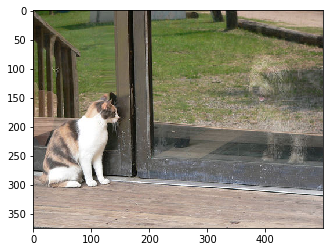

In [438]:
plt.imshow(image)

In [439]:
# ↑この画像にbboxをつける
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

[366.7, 80.84, 132.8, 181.84]
[5.66, 138.95, 147.09, 164.88]


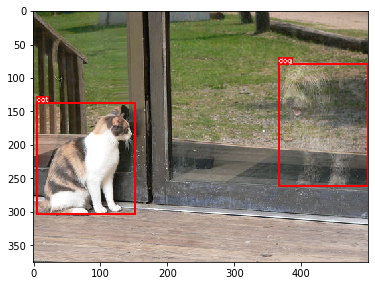

In [440]:
visualize(annotations, category_id_to_name)

[366.7, 112.32000000000001, 132.8, 181.83999999999997]
[5.66, 71.17, 147.09, 164.88]


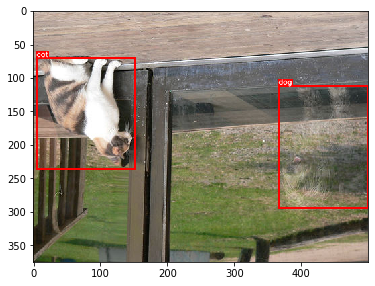

In [441]:
aug = get_aug([VerticalFlip(p=1)])#垂直に反転（ｐは変換する確率）
#辞書に対しての**は，要素のキーkeyが引数名、値valueが引数の値として展開されて、それぞれ個別の引数として渡される
augmented = aug(**annotations)#annotations= (image, bndbox, label)
visualize(augmented, category_id_to_name)

## ２．自分のデータを拡張
### （１）データの準備

In [442]:
#アノテーションされたimageデータのpass
img_path = './Sprint18_resize_image/'
img_list = glob.glob(img_path + '/*' + '.jpg')

#imageデータをnumpy配列にする
img_array = np.empty((0,256,256,3))

for img in img_list:
    image = Image.open(img)
    image = np.array(image)# PIL.Image.Imageからnumpy配列へ
    image = image.reshape((1,256,256,3))# axisの追加
    img_array = np.concatenate([img_array, image], axis = 0)

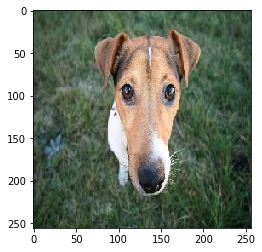

In [443]:
#最後の画像を見てみる
img = img_list[-1]
img = Image.open(img)
plt.imshow(img)

In [444]:
# xmlファイルを読み込んでリストにする
xml_path = './Sprint18_bbox/'
xml_path_list  = glob.glob(xml_path + '/*' + '.xml')

#xmlを読むライブラリ
import xml.etree.ElementTree as ET

bbox = np.empty((0,4))
for x in xml_path_list:
    tree = ET.parse(x)#xmlファイルの読み込み
    root = tree.getroot() #ルートの取得
    data = root.find('object').find('bndbox') #ほしい場所を見つける
    xmin = int(data.find("xmin").text)
    ymin = int(data.find("ymin").text)
    xmax = int(data.find("xmax").text)
    ymax = int(data.find("ymax").text)
    x_array = np.array([xmin,ymin,xmax,ymax]).reshape(1,-1)
    bbox = np.concatenate([bbox, x_array], axis = 0)
bbox.shape

(14, 4)

In [445]:
category_array = [0,0,0,0,0,0,0,1,1,1,1,1,1,1]
len(category_array)

14

### （２）物体検出しながら，データを拡張する

In [446]:
#私の作成した境界ボックスはpascal_voc
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [450]:
def aug_fanc(img_array,bbox,category_array):
    """垂直＆左右に反転する関数
    input
    ------------
    img_array : 画像データのndarray  shape(n_sample,image_size,image_size,n_channel)
    bbox : バウンディングボックスの座標 ndarray  shape(xmin,ymin,xmax,ymax)
    category_array : クラスラベル shape(n_sample,)
    output
    -------------
    augmented_img : 拡張後の画像ndarray shape(n_sample×2,image_size,image_size,n_channel)
    bbox_array : 拡張後のバウンディングボックスの座標 
      
    """
    
    #初期化
    aug_h = get_aug([HorizontalFlip(p=1)]) #左右反転
    aug_v = get_aug([VerticalFlip(p=1)])   #垂直に反転
    
    augmented_img = np.empty((0,256,256,3))#拡張データを入れる
    bbox_array = np.empty((0,4))#拡張データに対するバウンディングボックスの座標
    category = np.empty((0,1))#犬か猫か
    
    for i in range(bbox.shape[0]):
        annotations = {'image': img_array[i], 'bboxes': [bbox[i]], 'category_id': [category_array[i]]}
        augmented_h = aug_h(**annotations)
        augmented_v = aug_v(**annotations)
                    
        a = augmented_h['image'].reshape(1,256,256,3)
        augmented_img = np.concatenate([augmented_img, a],axis=0)
        aa = augmented_v['image'].reshape(1,256,256,3)
        augmented_img = np.concatenate([augmented_img, aa],axis=0)
        
        b = np.array(augmented_h['bboxes']).reshape(1,4)
        bbox_array = np.concatenate([bbox_array,b],axis=0)
        bb = np.array(augmented_v['bboxes']).reshape(1,4)
        bbox_array = np.concatenate([bbox_array,bb],axis=0)
        #c = np.array(augmented['category_id']).reshape(1,1)
        #category = np.concatenate([category,c],axis=0)
    return augmented_img, bbox_array

In [451]:
augmented_img, bbox_array = aug_fanc(img_array,bbox,category_array)
augmented_img.shape

(28, 256, 256, 3)

In [454]:
def visualize(img_data, bndbox,i):
    """
    画像データにbboxをつける
    """
    x_min, y_min, x_max, y_max = bndbox[i].reshape(4,)
    box_image = cv2.rectangle(img_data[i].astype(np.uint8), (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(255,0,0), thickness = 2)
    
    return box_image

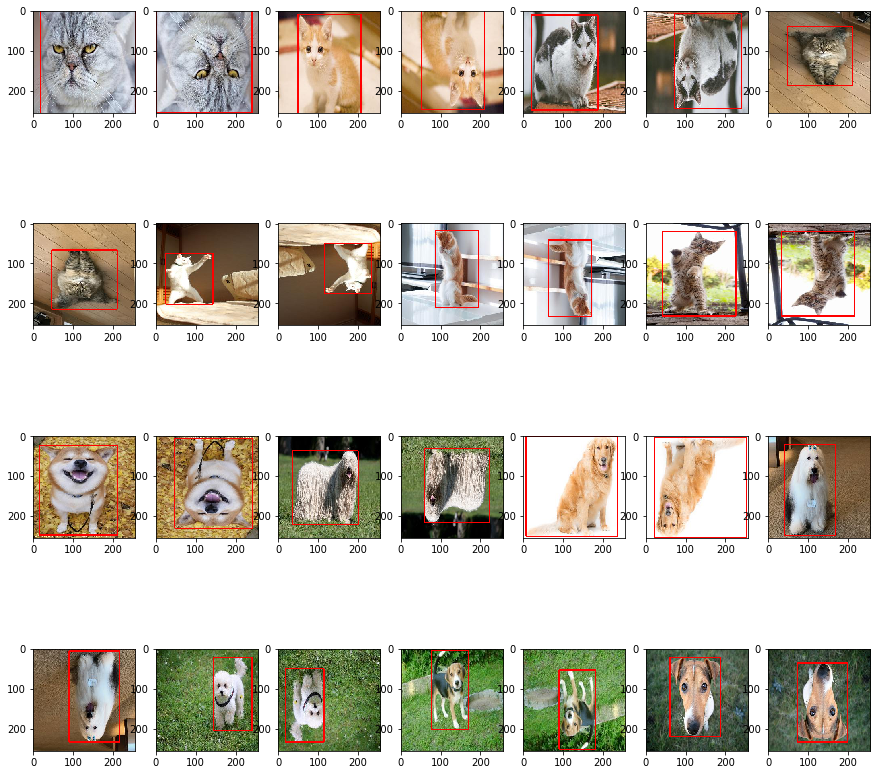

In [455]:
num = augmented_img.shape[0]
plt.figure(figsize=(15,15))
for i in range(num):
    a=visualize(augmented_img,bbox_array,i)
   
    plt.subplot(4,7,i+1)
    plt.imshow(a)

In [30]:
#!pip install scikit-image==0.15.0

In [1]:
#!pip uninstall scikit-image --user


Usage:   
  pip uninstall [options] <package> ...
  pip uninstall [options] -r <requirements file> ...

no such option: --user
